In [8]:
import numpy as np # Matrix mutliplications
import pandas as pd # data processing and for CSV files usage

In [9]:
#Reading data
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [10]:
#Checking data for shape and type
#train has data from 42000 images (1 dimension: 28 by 28 i.e. 784 pixels) and has a label column
# the test has data from 28k images which is fed to the CNN so that it's newer data not seen by CNN beforehand (1D 28 by 28 i.e. 784 pixels)
#there is no label column in the test data which is the goal to be predicted predicted.
print(train.shape)
atrain = train.shape[0]

print(test.shape)
atest = test.shape[0]

train.head(15)

(60000, 785)
(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [11]:
#Check for the data type
#It is int64 for both train and test
print(train.dtypes[0])


int64


In [12]:
#CNN needs to be provided with x_train in order to map the weights from this to y_train
# array containing labels of each image
y_train = train["label"]
# dataframe containing all pixels (the label column is dropped)
x_train = train.drop("label", axis=1)

# the images are squared shape therefore:
from math import sqrt
dim = int(sqrt(x_train.shape[1]))
print("The images are {}x{} squares.".format(dim, dim))

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)


# array containing labels of each image
y_test = test["label"]
# dataframe containing all pixels (the label column is dropped)
x_test = test.drop("label", axis=1)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)
# checking the y_train
y_train.head(10)

The images are 28x28 squares.
Shape of x_train:  (60000, 784)
Shape of y_train:  (60000,)
Shape of x_test:  (10000, 784)
Shape of y_test:  (10000,)


0    2
1    9
2    6
3    0
4    3
5    4
6    4
7    5
8    4
9    8
Name: label, dtype: int64

(60000,)
<class 'pandas.core.series.Series'>
9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64
The mean amount of elements per class:  6000.0
The standard deviation in the element per class distribution:  0.0


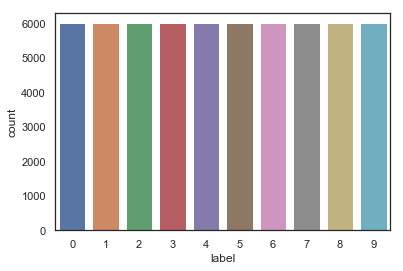

In [13]:
#Computing the mean and standard deviation of the classes here:
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# plotting no: of images in each class
sns.countplot(y_train)

print(y_train.shape)
print(type(y_train))

# array with each class and its number of images
vals_class = y_train.value_counts()
print(vals_class)

# mean and std
class_mean = np.mean(vals_class)
class_std = np.std(vals_class,ddof=1)

print("The mean amount of elements per class: ", class_mean)
print("The standard deviation in the element per class distribution: ", class_std)

# 68% - 95% - 99% rule, the 68% of the data should be cls_std away from the mean and so on
if class_std > class_mean * (0.6827 / 2):
    print("The standard deviation is high")
#no: of classes = 10
#the distribution of the pictures per class is homogeneous
    


In [14]:
#Checking and Reporting for any missing values
def missing_values(df):
    print(df.isnull().any().describe())
    print("Yes, missing values" if df.isnull().any().any() else "No missing values")

    if df.isnull().any().any():
        print(df.isnull().sum(axis=0))
        
    print()
        
missing_values(x_train)
missing_values(x_test)

count       784
unique        1
top       False
freq        784
dtype: object
No missing values

count       784
unique        1
top       False
freq        784
dtype: object
No missing values



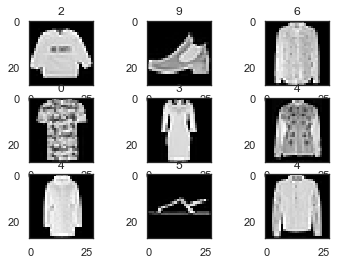

In [15]:
#Visulizations
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# convert train dataset to the format for plotting: (num_images, img_rows, img_cols)
x_train_vis = x_train.values.reshape(atrain, dim, dim)

# subplot(2,3,3) = subplot(233)
# a grid of 3x3 is created and then plots are inserted in these slots
for i in range(0,9): # No: of images for displaying from the 3x3 grid
    plt.subplot(330 + (i+1)) # opening the next subplot
    plt.imshow(x_train_vis[i], cmap=plt.get_cmap('gray')) #Grayscale; Pixels are etiher black or white 
    plt.title(y_train[i]);

In [16]:
#Normalization for faster Neural Network Convergenece
x_train = x_train / 255.0
x_test = x_test / 255.0

In [17]:
#Reshaping
def reshape_image(df):
    print("Original shape, pixels are  1D vector:", df.shape)
    df = df.values.reshape(-1, dim, dim, 1) 
    # -1 means the dimension doesn't change, so 42000 in the case of xtrain and 28000 in the case of test
    print("New Shape, pixels are now 28x28x1 3D matrix:", df.shape)
    return df

x_train = reshape_image(x_train) # numpy.ndarray type
x_test = reshape_image(x_test) # numpy.ndarray type

Original shape, pixels are  1D vector: (60000, 784)
New Shape, pixels are now 28x28x1 3D matrix: (60000, 28, 28, 1)
Original shape, pixels are  1D vector: (10000, 784)
New Shape, pixels are now 28x28x1 3D matrix: (10000, 28, 28, 1)


In [18]:
#One-hot enconding for defining the type of loss for the NN later i.e categorical_crossentropy
#the targets are required to be in categorical format i.e. one hot-vectors
from keras.utils.np_utils import to_categorical

print(type(y_train))
# number of classes
number_classes = y_train.max() - y_train.min() + 1

print("Original Shape of y_train: ", y_train.shape)

y_train = to_categorical(y_train, num_classes = number_classes)

print("Newer Shape of y_train  ", y_train.shape)
print(type(y_train))

Using TensorFlow backend.


<class 'pandas.core.series.Series'>
Original Shape of y_train:  (60000,)
Newer Shape of y_train   (60000, 10)
<class 'numpy.ndarray'>


In [19]:
from sklearn.model_selection import train_test_split

# random seed for reproducibility purpose
seed = 2
np.random.seed(seed)

# percentage of x_train which will be x_val
split_pct = 0.2

# Splitting the train and the validation set
#random_state for splitting data in a pseudo-random manner/division
#stratify for avoiding any overrepresentation of labels in the val set
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                              y_train, 
                                              test_size=split_pct,
                                              random_state=seed,
                                              stratify=y_train
                                             )

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(48000, 28, 28, 1) (48000, 10) (12000, 28, 28, 1) (12000, 10)


In [20]:
#Libraries and packages for CNN
from keras import backend as K
# architecture,optimizer, data generator and learning rate reductor
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [21]:
#Model is in the form:
#INPUT LAYER -> [CONV2D -> RELU → MAXPOOL2D → DROPOUT]*3-> FLATTEN->DENSE-> OUTPUT LAYER
model = Sequential()

dim = 28
nclasses = 10

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


#Flatten,Dense Layer,Softmax classifier
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
#Display Model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
__________

In [23]:
#compile model using Adam optimizer
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
#setting learning annealer
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience= 3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

In [25]:
#Data augmentation
datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=30,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image 
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images



In [26]:
#setting epochs and batch sizes
#Please change it to 20 and 64
epochs = 20
batch_size = 64

In [27]:
#Data fitting

history = model.fit(x=x_train, 
                    y=y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1,
                    callbacks=[lr_reduction],
                    validation_data=(x_val,y_val), 
                    shuffle=True)


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 249s 5ms/step - loss: 0.5659 - acc: 0.7897 - val_loss: 0.3738 - val_acc: 0.8580
Epoch 2/20
48000/48000 [==============================] - 435s 9ms/step - loss: 0.3608 - acc: 0.8679 - val_loss: 0.2970 - val_acc: 0.8912
Epoch 3/20
48000/48000 [==============================] - 448s 9ms/step - loss: 0.3141 - acc: 0.8831 - val_loss: 0.3042 - val_acc: 0.8838
Epoch 4/20
48000/48000 [==============================] - 367s 8ms/step - loss: 0.2824 - acc: 0.8956 - val_loss: 0.2529 - val_acc: 0.9074
Epoch 5/20
48000/48000 [==============================] - 363s 8ms/step - loss: 0.2631 - acc: 0.9014 - val_loss: 0.2461 - val_acc: 0.9097
Epoch 6/20
48000/48000 [==============================] - 362s 8ms/step - loss: 0.2485 - acc: 0.9070 - val_loss: 0.2427 - val_acc: 0.9117
Epoch 7/20
48000/48000 [==============================] - 309s 6ms/step - 

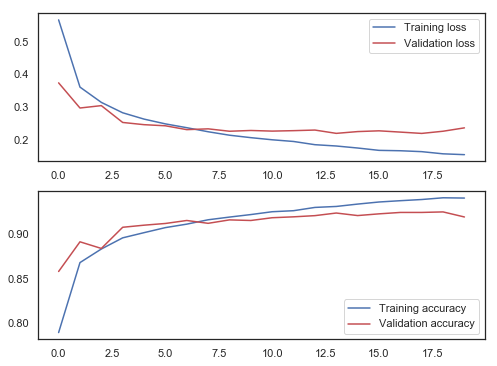

In [28]:
#plotting of data

fig, ax = plt.subplots(2,figsize=(8,6))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=False)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy",axes=ax[1])
legend = ax[1].legend(loc='lower right', shadow=False)



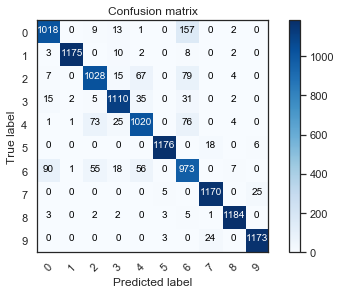

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
#This function is for printing and plotting of  the confusion matrix
#set normalization to true if you wish to apply
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predicting the values from the validation dataset
y_predict_onehot = model.predict(x_val)
# Converting prediction classes from one hot vectors to labels
y_predict = np.argmax(y_predict_onehot,axis=1)
# Converting validation observations from one hot vectors to labels
y_true = np.argmax(y_val,axis=1)
# confusion matrix calculation
confusion_mat = confusion_matrix(y_true, y_predict)
# plotting the matrix
plot_confusion_matrix(confusion_mat, classes=range(number_classes))

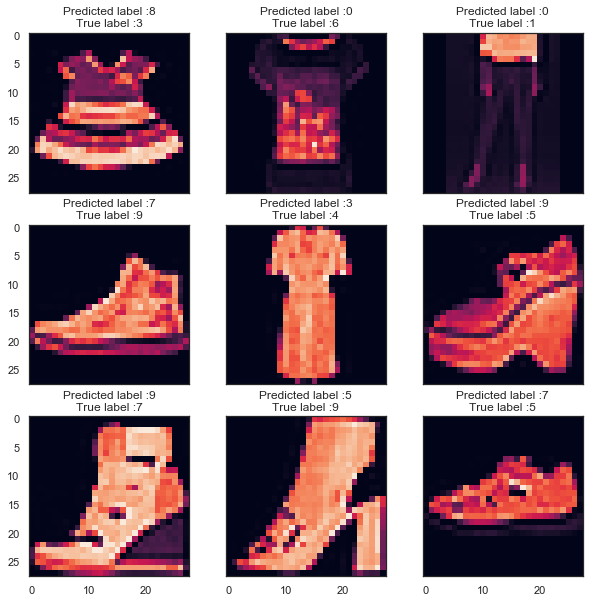

In [30]:
#Plotting errors here
# array of bools with true if there is an error and false when the image is correct
errors = (y_predict - y_true != 0) 

y_predict_error = y_predict_onehot[errors]
y_predict_classes_error = y_predict[errors]
y_true_error = y_true[errors]
x_val_error = x_val[errors]
#This function is used for displaying 9 images with their predicted + real labels
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    
    n = 0
    num_rows = 3
    num_cols = 3
    fig, ax = plt.subplots(num_rows, num_cols, sharex=True, sharey=True,figsize=(10,10))
    for row in range(num_rows):
        for col in range(num_cols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
y_predict_error_prob = np.max(y_predict_error,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_error = np.diagonal(np.take(y_predict_error, y_true_error, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = y_predict_error_prob - true_prob_error

# Sorted list of the delta probability errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 9 errors, Range is modifiable
top_9_error = sorted_delta_er[-9:]

# Show the top 9 errors
display_errors(top_9_error, x_val_error, y_predict_classes_error, y_true_error)

In [31]:
#Determining the accuracy score
from sklearn.metrics import accuracy_score 
y_prediction_test = model.predict_classes(x_test)
print("test_acc", accuracy_score(y_test.values, y_prediction_test))

test_acc 0.9202
